# Stratified train/test sets


## Initialization

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedShuffleSplit



In [8]:

# df -> means "data frame"
df = pd.read_csv("./test-data.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:

# take all the rows, take all the columns except the last column one

X = df.iloc[:, :-1].values # will contains the values of the columns 'R&D Spend', 'Administration', 'Marketing Spend', 'State'

# take all the rows, take only the last column

y = df.iloc[:, -1].values # will contains the values of the columns 'Profit'

# print(f"X {X}")
# print(f"y {y}")


## Visualization (unstratified)

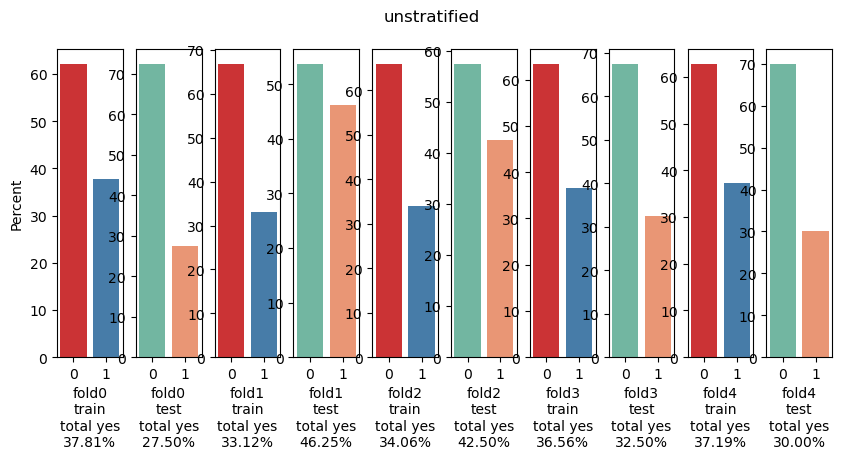

In [46]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
# kfold = StratifiedShuffleSplit(n_splits=num_folds, random_state=0)

# plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(1, num_folds * 2, figsize=(2 * num_folds,4))

fig.suptitle('unstratified')

for index, (train_indices, test_indices) in enumerate(kfold.split(X, y)):
  # X_train = X[train_indices, :]
  y_train = y[train_indices]
  # X_test = X[test_indices, :]
  y_test = y[test_indices]

  df_y_train = pd.DataFrame(y_train, columns=['y_train'])
  df_y_test = pd.DataFrame(y_test, columns=['y_test'])

  percent_yes_train = (df_y_train == True).sum() / df_y_train.shape[0]
  percent_yes_test  = (df_y_test == True).sum() / df_y_test.shape[0]

  plt.subplot(1, num_folds * 2, index * 2 + 1)
  sns.countplot(x='y_train', data=df_y_train, hue='y_train', palette='Set1', stat='percent')
  if index == 0:
    plt.ylabel('Percent')
  else:
    plt.ylabel('')
  plt.legend().remove()
  plt.xlabel(f'fold{index}\ntrain\ntotal yes\n{float(percent_yes_train.iloc[0])*100:.2f}%')

  plt.subplot(1, num_folds * 2, index * 2 + 2)
  sns.countplot(x='y_test', data=df_y_test, hue='y_test', palette='Set2', stat='percent')
  plt.ylabel('')
  plt.legend().remove()
  plt.xlabel(f'fold{index}\ntest\ntotal yes\n{float(percent_yes_test.iloc[0])*100:.2f}%')

plt.show()

## Visualization (stratified)

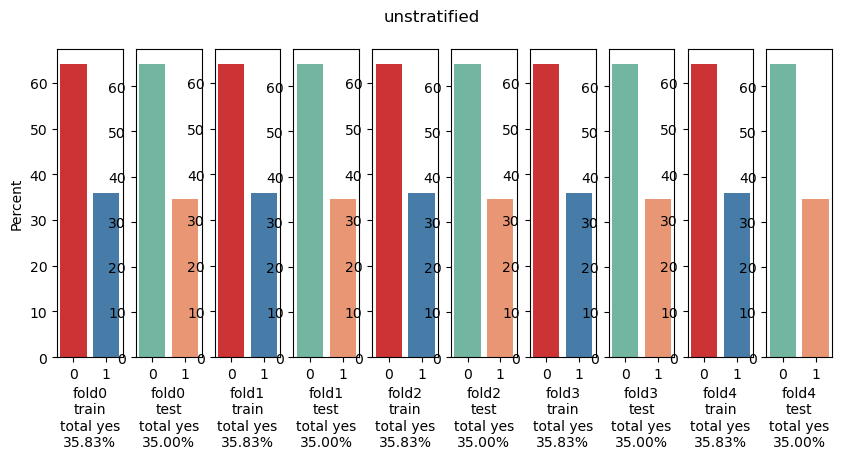

In [45]:
num_folds = 5

# kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
kfold = StratifiedShuffleSplit(n_splits=num_folds, random_state=0)

# plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(1, num_folds * 2, figsize=(2 * num_folds,4))

fig.suptitle('unstratified')

for index, (train_indices, test_indices) in enumerate(kfold.split(X, y)):
  # X_train = X[train_indices, :]
  y_train = y[train_indices]
  # X_test = X[test_indices, :]
  y_test = y[test_indices]

  df_y_train = pd.DataFrame(y_train, columns=['y_train'])
  df_y_test = pd.DataFrame(y_test, columns=['y_test'])

  percent_yes_train = (df_y_train == True).sum() / df_y_train.shape[0]
  percent_yes_test  = (df_y_test == True).sum() / df_y_test.shape[0]

  plt.subplot(1, num_folds * 2, index * 2 + 1)
  sns.countplot(x='y_train', data=df_y_train, hue='y_train', palette='Set1', stat='percent')
  if index == 0:
    plt.ylabel('Percent')
  else:
    plt.ylabel('')
  plt.legend().remove()
  plt.xlabel(f'fold{index}\ntrain\ntotal yes\n{float(percent_yes_train.iloc[0])*100:.2f}%')

  plt.subplot(1, num_folds * 2, index * 2 + 2)
  sns.countplot(x='y_test', data=df_y_test, hue='y_test', palette='Set2', stat='percent')
  plt.ylabel('')
  plt.legend().remove()
  plt.xlabel(f'fold{index}\ntest\ntotal yes\n{float(percent_yes_test.iloc[0])*100:.2f}%')

plt.show()